# Distributions, Mean, and Variance

## Random Variables

A random variable is a function from a set of all possible outcomes,
named the **sample space**, to exactly one real number.  We often
assume that random variables follow named distributions, e.g. $Y \sim
\text{Uniform}(a, b)$ where $a < b$, or $X \sim \text{Bernoulli}(p)$ where $p
\in [0, 1]$.  Named distributions are common because they often
abstractly represent processes in the world worth measuring.  Based on
the outcome of the process of interest, we calculate probabilities
for a random variable that follows a specific distribution.

The Uniform distribution represents well rolling die.  Much of the
probabilities surrounding gambling are found by assuming random
variables follow various Uniform distributions.  Ignoring payouts, roulette is essentially a random variable $X \sim \text{Uniform}(1, 36)$.

The Bernoulli distirbution represents well any process that has two
mutually exclusive outcomes with a fixed probability of "success."
Anything from unfair coins to the outcomes of elections are modeled
with Bernoulli random variables.

These are not the only random variables, nor are random variables
restricted to countable outcomes.  Discrete random variables are
restrictued to countable outcomes and continous random variables are
the extension to uncountable outcomes.  Discrete random variables take
on non-negative mass or probability at single points in the
**support** of the random variable, and thus have probability mass
functions.  On the other hand, continuous random variables have
probability density functions, since zero mass occurs at distinct
points in the support of the random variable.  These lecture notes
will only use the name probability density functions, even when
referring to discrete random variables.

Before providing a long list of some other common named distributions, we will discuss the mean and variance of a random variable.  These quantities describe a measure of center and a measure of spread of random variables.  Recall, statistics uses data to estimate population parameters.  The mean and variance of a random variable are two of the more commonly estimated quantities that describe a population.  With a data set in hand, the sample mean (add up all the data divide by the number of data points) is an approximation of the mean of a random variable.  With a data set in hand, the measure of spread called the variance is an approximation of the variance of a random variable.

In [7]:
library(ggplot2)

In [8]:
update_geom_defaults("point", list(colour = "blue"))
update_geom_defaults("density", list(colour = "blue"))
update_geom_defaults("path", list(colour = "blue"))
old <- theme_set(theme_bw() + theme(text = element_text(size=18)))

## Mean of a Random Variable

Think back to our discrete random variable that represented rolling a
single fair die, $X \sim \text{Uniform}(1, 6)$.  We formalized the
mathematical notation $P(X \in \{2,4,6\}) = 1/2$ by imagining
rolling the same fair die an infinite number of times and dividing the
number of times either $2, 4$, or $6$ turns up by the total number of
rolls.  Next, we will formalize, in a similar notion, the idea of the mean of a random variable.

The expected value describes a measure of center of a random
variable.  This is related to but not exactly, the same thing as, the sample
mean where you add up all the numbers and divide by how every many
numbers there are.  The expected value does not describe data.  The expected value instead describes a measure of
center of the probaility density function for a random variable.

For the discrete random variable $X \sim \text{Uniform}(1, 6)$ the probability density function is displayed below.  More generally, as uniform implies sameness, mathematically the probability density function is the same for all arguments

$$uniform(x|a, b) = \frac{1}{b - a + 1} $$

for $x \in \\{a, a+1, \ldots, b-1, b\\}$.  Notice that the random variable is only defined for integer values between $a$ and $b$ inclusive.  These values make up the **support** of the random variable. Think of the support as the values for which the probability density function is positive.

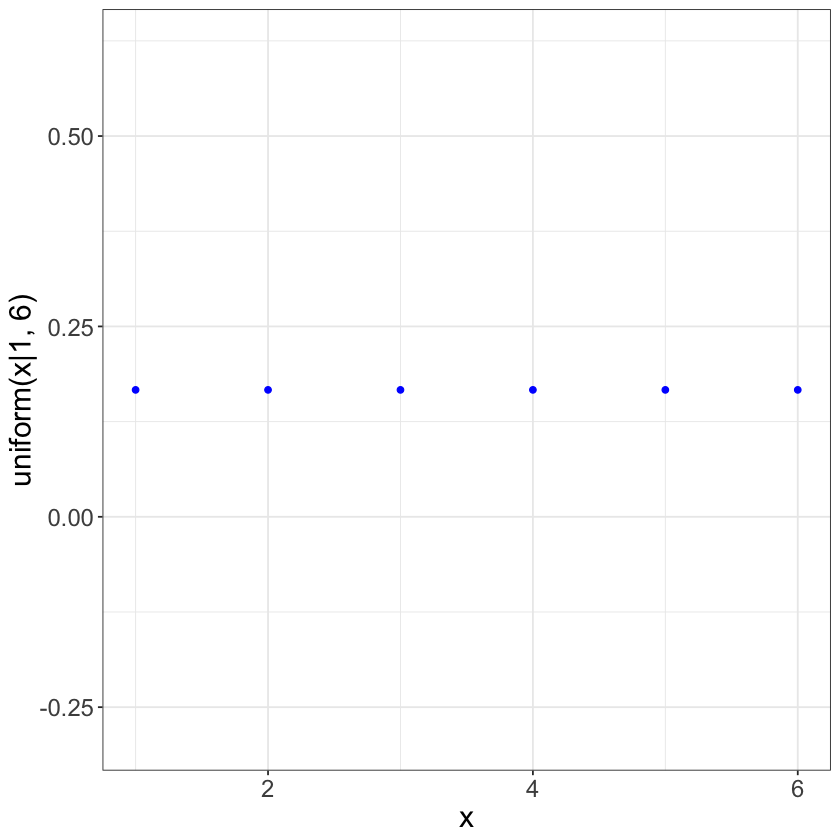

In [9]:
x <- 1:6
fx <- 1 / (6 - 1 + 1)
df <- data.frame(x, fx)
ggplot(df, aes(x, fx)) + geom_point() + labs(y='uniform(x|1, 6)')

### Example

Since population mean describes a measure of center, and the probability density function takes on the same value $1/6$ at each value in the support $\{1, 2, 3, 4, 5, 6\}$, the expected value must be the value in the middle of the support, namely $3.5$.  Formally, we read $\mathbb{E}(X) = 3.5$ as the **expected value** of the random variable $X$ is $3.5$.  As the sample mean is to data, the expected value is to a random variable.  

More formally, the expected value of $X \sim \text{Uniform}(a, b)$ is

$$ \mathbb{E}(X) = \sum_{x = a}^b x * \text{uniform}(x|a,b) = \sum_{x = a}^b x * \frac{1}{b - a + 1}. $$

In R, we can apply this formula to $X \sim \text{Uniform}(1,6)$,

In [10]:
a <- 1; b <- 6
x <- a:b
fx <- 1 / (b - a + 1)
sum(x * fx) # E(X)

[1] 3.5

Notice that the we are simply weighting each value in the support of the random variable by the probability density function evaluated at each value in the support.  The expected value is to be thought of as the value you'd get by taking the sample mean of the outcomes produced by infinitely rolling a fair die.  Let's approximate this process in R,

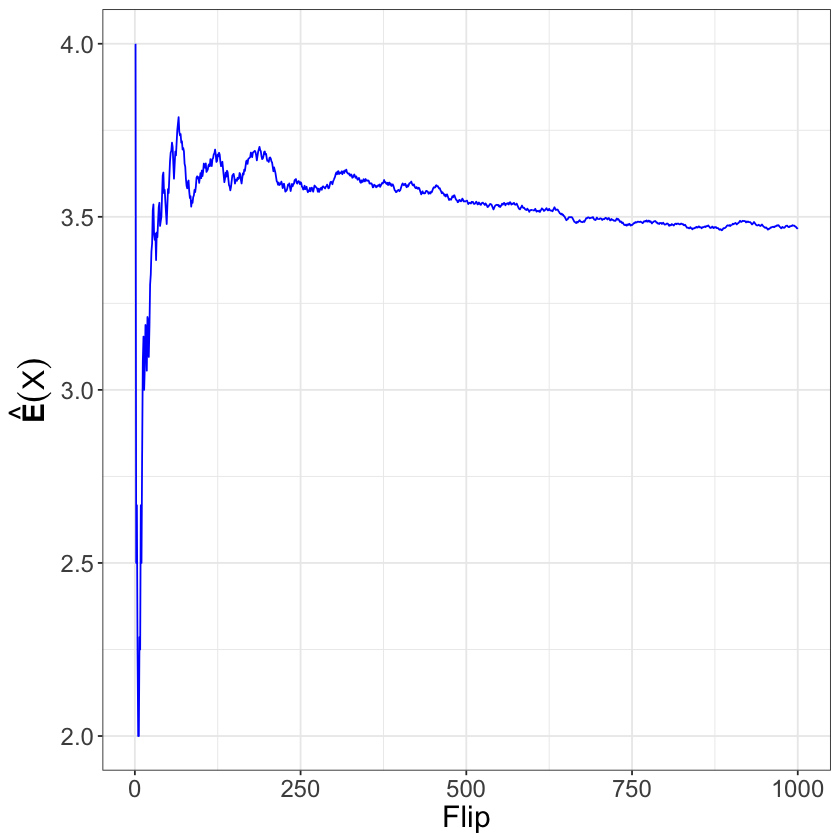

In [11]:
flips <- 1e3
die <- sample(1:6, flips, replace=TRUE)
df <- data.frame(m = cumsum(die)/(1:flips), Flip = 1:flips)
ggplot(df, aes(Flip, m)) + geom_line() + labs(y=expression(hat(bold(E))(X)), parse=TRUE)

**DEFINITION**.  Let $X \sim F$, where $F$ is the name of a distribution. The expected value of a random variable is

$$ \mathbb{E}(X) = \int_{\mathbb{R}} x\,d\text{F}(x).$$

The fancy integral here is just to remind you that for discrete random variables, the integral becomes a sum, as above, and for continuous random variables the integral stays.  In both cases, the sum/integral ranges over the support of the random variable and the summand/integrand is the product of $x$ and the probability density function.

## Variance and Standard Deviation of a Random Variable

Where the mean is a measure of center of a random variable, the variance is a measure of spread.  Specifically, the variance measures squared distance from the mean, again weighted by the probability density function.  

**DEFINITION**.  Let $X \sim F$, where $F$ is the name of a distribution function with mean $\mu = \mathbb{E}(X)$, the variance of $X$ is 

$$ \mathbb{V}(X) = \int_{\mathbb{R}} (x - \mathbb{E}(X))^2 \, dF(x).$$

**DEFINITION**. Let $X \sim F$, where $F$ is the name of a distribution function with variance $\mathbb{V}(X)$, the standard deviation of $X$ is

$$ \mathbb{D}(X) = \sqrt{\mathbb{V}(X)}.$$

The standard deviation is another measure of spread, like the variance, but the standard deviation is in the same units as the mean.

### Example

In R, we can apply this formula to $X \sim \text{Uniform}(1,6)$ by first calculating the expected value $\mathbb{E}(X)$,

In [12]:
a <- 1; b <- 6
x <- a:b
fx <- 1 / (b - a + 1)
m <- sum(x * fx)
(v <- sum((x - m)^2 * fx)) # variance
sqrt(v) # standard deviation

[1] 2.916667

[1] 1.707825

It takes some time to understand the fancy integral notation above.  There are a few ideas that you should keep in mind when working with the definitions of $\mathbb{E}(X)$ and $\mathbb{V}(X)$:

1. if the random variable $X$ is discrete then the integral is really a sum,
2. the summand/integrand is defined as the product of the function that shows up in front of $dF(x)$ times the probability density function of $X$, and
3. the summand/integrand is evaluated at each value in the support of the random variable $X$.

# Common Distributions

There are a few moving pieces to keep in mind while scanning or
referencing the list of distributions below.

1. Each distribution presented is a generally accepted statistical
  abstraction of a common process in the world.  Different sets of the
  real numbers $\mathbb{R}$ will support different real world
  processes.  For instance, when measuring time until an event
  (Exponential), only positively valued real numbers are relevant.
  When measuring counting events (Poisson), only positive integers are
  relevant.  This idea is known as the **support** of the probability
  density function.  The support describes the set of possible values
  a random variable might take on.

2. The variables following the pipe in the function signature are
   generally referred to as parameters.  For instance, $a$ and $b$ of
   the uniform distribution define the support of the random variable.
   For a discrete uniform random variable meant to describe the
   process of rolling a die, $a = 1$ and $b = 6$.  These parameters
   constitue some, but not all, of the population parameters that are
   estimated from a sample.  The parameter $\beta$ in the Exponential
   distribution describes the rate at which events occur in time or space.

3. These lecture notes focus on the likelihood function as a means to
   estimate population parameters from a sample.  This method will
   work simply for any probability density function who's
   support does not depend on the parameters.  However, the maximum
   likelihood estimator for the uniform distribution will take more
   careful thought than it will direct application of calculus.

## Discrete Distributions

### Uniform

For $X \sim \text{Uniform}(a, b)$ where $a < b$, $X$ has probability
density function

$$ \text{uniform}(x | a, b) = \frac{1}{b - a + 1} $$

for $x \in \\{a, a+1, \ldots, b - 1, b \\}$.

$$ \mathbb{E}(X) = \frac{b+a}{2} \quad \text{ and } \quad \mathbb{V}(X) = \frac{(b - a + 1)^2 - 1}{12}$$

### Bernoulli

For $X \sim \text{Bernoulli}(p)$ where $p \in [0, 1]$, $X$ has
probability density function

$$ \text{bernoulli}(x | p) = p^x (1 - p)^{1 - x} $$

for $x \in \\{0, 1\\}$.

$$ \mathbb{E}(X) = p \quad \text{ and } \quad \mathbb{V}(X) = p(1 - p)$$

### Geometric

For $X \sim \text{Geometric}(p)$ where $p \in [0, 1]$, $X$ has
probability density function

$$ \text{geometric}(x | p) = p (1 - p)^{x - 1} $$

for $x \in \\{1, 2, \ldots \\}$.

$$ \mathbb{E}(X) = 1/p \quad \text{ and } \quad \mathbb{V}(X) = \frac{1 - p}{p^2}$$

### Binomial

For $X \sim \text{Binomial}(K, p)$ where $K \in \mathbb{N} \\
\\{0\\}$ and $p \in [0, 1]$, $X$ has probability density funciton

$$ \text{binomial}(x | K, p) = {K \choose x} p^x (1 - p)^{K - x} $$

for $x \in \\{0, 1, \ldots, K \\}$.

$$ \mathbb{E}(X) = Kp \quad \text{ and } \quad \mathbb{V}(X) = Kp(1 - p)$$

### Poisson

For $X \sim \text{Poisson}(\lambda)$ where $\lambda > 0$, $X$ has
probability density function

$$ \text{poisson}(x | \lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$$

for $x \in \mathbb{N}$.

$$ \mathbb{E}(X) = \lambda \quad \text{ and } \quad \mathbb{V}(X) = \lambda $$

## Continuous Distributions

### Uniform

For $X \sim \text{Uniform}(a, b)$ where $a < b$, $X$ has probability
density function

$$ \text{uniform}(x | a, b) = \frac{1}{b - a} $$

for $x \in [a, b]$.

$$ \mathbb{E}(X) = \frac{b+a}{2} \quad \text{ and } \quad \mathbb{V}(X) = \frac{(b - a)^2}{12}$$

### Beta

For $X \sim \text{Beta}(\alpha, \beta)$ where $\alpha > 0$ and
$\beta > 0$, $X$ has probability density function

$$ \text{beta}(x | \alpha, \beta) = \frac{\Gamma(\alpha +
\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta -
1}$$

for $x \in [0, 1]$.

$$ \mathbb{E}(X) = \frac{\alpha}{\alpha + \beta} \quad \text{ and } \quad \mathbb{V}(X) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$$


### Exponential

For $X \sim \text{Exponential}(\beta)$ where $\beta > 0$, $X$ has
probability density function

$$ \text{exponential}(x | \beta) = \beta\exp{ (-\beta x) } $$

for $x \geq 0$.

$$ \mathbb{E}(X) = 1 / \beta \quad \text{ and } \quad \mathbb{V}(X) = 1 / \beta^2 $$

### Gamma

For $X \sim \text{Gamma}(\alpha, \beta)$ where $\alpha > 0$ and
$\beta > 0$, $X$ has probability density function

$$ \text{gamma}(x | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} \exp{ (-\beta x) } $$

for $x \geq 0$.

$$ \mathbb{E}(X) = \alpha / \beta \quad \text{ and } \quad \mathbb{V}(X) = \alpha / \beta^2 $$

### Normal

For $X \sim \text{Normal}(\mu, \sigma)$ where $\mu \in \mathbb{R}$ and
$\sigma > 0$, $X$ has probability density function

$$ \text{normal}(x | \mu, \sigma) = (2\sigma^2)^{-1/2} \exp{ \left(
\frac{-(x - \mu)^2}{2\sigma^2} \right) }$$

for $x \in \mathbb{R}$.

$$ \mathbb{E}(X) = \mu \quad \text{ and } \quad \mathbb{V}(X) = \sigma^2 $$

### Student-t

For $X \sim \text{StudentT}(\nu, \mu, \sigma)$ where $\nu > 0$, $\mu
\in \mathbb{R}$, and $\sigma > 0$, $X$ has probability density
function

$$ \text{studentT}(x | \nu, \mu, \sigma) = \frac{\Gamma((\nu + 1) /
2)}{\Gamma(\nu/2) \sqrt{\nu\pi\sigma^2}} \left( 1 +
\frac{1}{\nu}\left(\frac{y - \mu}{\sigma}\right)^2 \right)^{-(\nu+1)/2}$$

for $x \in \mathbb{R}$.

$$ \mathbb{E}(X) = \mu \quad \text{ and } \quad \mathbb{V}(X) = \sigma^2 \frac{\nu}{\nu - 2} $$